# The following analysis covers the Washington State Voter turnout from 2007 until 2023

The data is sourced from the Washington Secretary of State Election data
https://www.sos.wa.gov/elections/data-research/election-data-and-maps/reports-data-and-statistics/voter-turnout-election


In [37]:
#-- Importing the nessesary libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix


In [3]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Washington GOP/mj/Washington State Election Participation.csv')

In [4]:
#-- Inspecting the head--#
df.head()

,Date,Election_Type,Counties,Precincts,Registered_Voters,Total_Ballots_Counted,TurnOut%
0,11/7/23,General Election,39,8078,4829084,1758084,36
1,8/1/23,Primary,36,6474,3865926,1116963,29
2,4/25/23,April Special Election,19,3189,1671514,530405,32
3,2/14/23,February Special Election,29,2543,1370164,451969,33
4,11/8/22,General Election,39,8021,4806852,3067686,64


In [5]:
#-- Inspecting the shape of the dataset --#
df.shape

(73, 7)

In [6]:
#-- Inspecting the column names --#
df.columns

Index(['Date', 'Election_Type', 'Counties', 'Precincts', 'Registered_Voters',
       'Total_Ballots_Counted', 'TurnOut%'],
      dtype='object')

In [7]:
#-- Inspecting the data types --#
df.dtypes

Date                     object
Election_Type            object
Counties                  int64
Precincts                 int64
Registered_Voters         int64
Total_Ballots_Counted     int64
TurnOut%                  int64
dtype: object

# Now conducting data cleaning

In [8]:
#-- Step 1: Convert 'Date' to datetime format -_#
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Step 2: Convert 'Election_Type' to binary using get_dummies --#
df = pd.get_dummies(df, columns=['Election_Type'], drop_first=True)




In [9]:
#-- Reinspecting the columns --#
df.columns

Index(['Date', 'Counties', 'Precincts', 'Registered_Voters',
       'Total_Ballots_Counted', 'TurnOut%',
       'Election_Type_February Special Election',
       'Election_Type_General Election',
       'Election_Type_March Special Election',
       'Election_Type_May Special Election',
       'Election_Type_Presidential Primary', 'Election_Type_Primary'],
      dtype='object')

In [10]:
#-- Reinspecting the shape --#
df.shape

(73, 12)

In [11]:
#-- Reinspecting the datatypes --#
df.dtypes

Date                                       datetime64[ns]
Counties                                            int64
Precincts                                           int64
Registered_Voters                                   int64
Total_Ballots_Counted                               int64
TurnOut%                                            int64
Election_Type_February Special Election             uint8
Election_Type_General Election                      uint8
Election_Type_March Special Election                uint8
Election_Type_May Special Election                  uint8
Election_Type_Presidential Primary                  uint8
Election_Type_Primary                               uint8
dtype: object

# Now exploring the variables

In [11]:
df_no_date = df.drop(columns=['Date'])

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

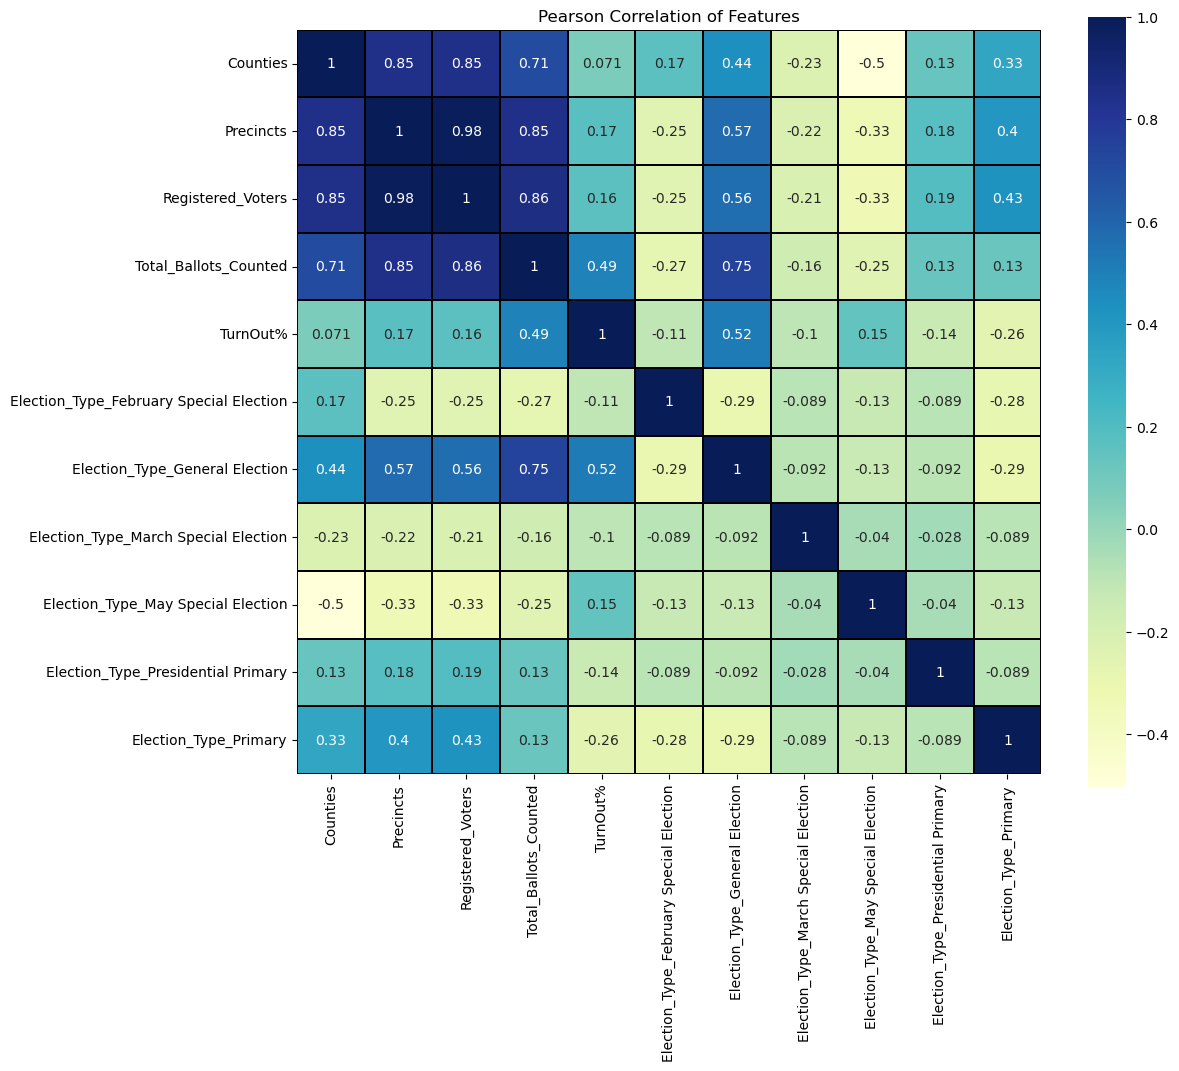

In [13]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
 
#-- Draw the heatmap using seaborn --#
sns.heatmap(df_no_date.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


In [12]:
#-- List of columns representing different election types --#
election_type_columns = [
    'Election_Type_February Special Election',
    'Election_Type_General Election',
    'Election_Type_March Special Election',
    'Election_Type_May Special Election',
    'Election_Type_Presidential Primary',
    'Election_Type_Primary'
]

#-- Get the total counts for each election type --#
total_counts = df[election_type_columns].sum()

#-- Display the total counts --#
print(total_counts)

Election_Type_February Special Election    16
Election_Type_General Election             17
Election_Type_March Special Election        2
Election_Type_May Special Election          4
Election_Type_Presidential Primary          2
Election_Type_Primary                      16
dtype: int64


In [13]:
#-- Ensuring 'Date' is in datetime format --#
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Grouping by 'Date' and sum the 'Counties' --#
data_grouped = df.groupby('Date')['Counties'].sum().reset_index()

#-- Displaying the grouped data to verify --#
print(data_grouped.head())

        Date  Counties
0 2007-11-06        39
1 2008-02-19        39
2 2008-03-11        12
3 2008-04-22         6
4 2008-05-20        11


In [14]:

#-- Ensuring 'Date' is in datetime format --#
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Extracting the year or month for grouping --#
df['Year'] = df['Date'].dt.year  # or use .dt.month for monthly histogram

#-- Group by year and sum the 'Counties' --#
data_grouped2 = df.groupby('Year')['Counties'].sum().reset_index()

#-- Display the grouped data to verify --#
print(data_grouped.head())

        Date  Counties
0 2007-11-06        39
1 2008-02-19        39
2 2008-03-11        12
3 2008-04-22         6
4 2008-05-20        11


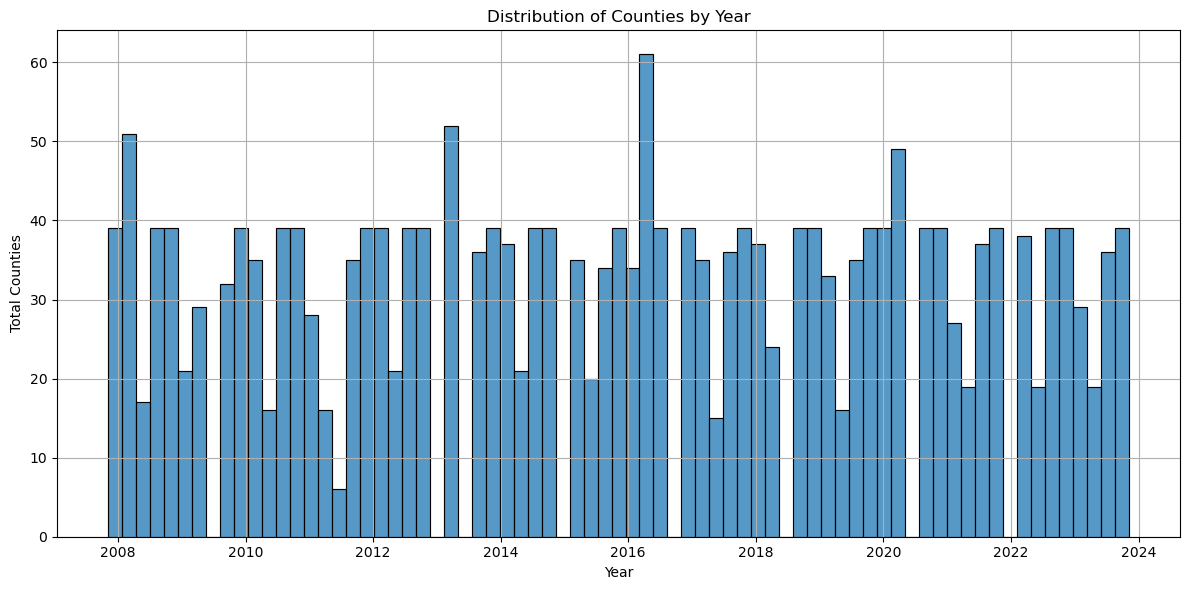

In [7]:

#-- Plotting the histogram --#
plt.figure(figsize=(12, 6))
sns.histplot(data=data_grouped, x='Date', weights='Counties', bins=len(data_grouped['Date'].unique()), kde=False)

#-- Adding titles and labels --#
plt.title('Distribution of Counties by Year')
plt.xlabel('Year')
plt.ylabel('Total Counties')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()


In [15]:
#-- Ensure 'Date' is in datetime format --#
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Extract the year or month for grouping --#
df['Year'] = df['Date'].dt.year  # or use .dt.month for monthly histogram

#-- Group by year and sum the 'Counties' --#
data_grouped2 = df.groupby('Year')['Counties'].sum().reset_index()

#-- Display the grouped data to verify --#
print(data_grouped.head())

        Date  Counties
0 2007-11-06        39
1 2008-02-19        39
2 2008-03-11        12
3 2008-04-22         6
4 2008-05-20        11


# Exploring the time and voter turn out %

In [16]:
#-- Grouping by 'Date' and sum the 'Counties' --#
data_grouped2 = df.groupby('Date')['TurnOut%'].sum().reset_index()

#-- Displaying the grouped data to verify --#
print(data_grouped2.head())

        Date  TurnOut%
0 2007-11-06         5
1 2008-02-19        42
2 2008-03-11         4
3 2008-04-22        46
4 2008-05-20        43


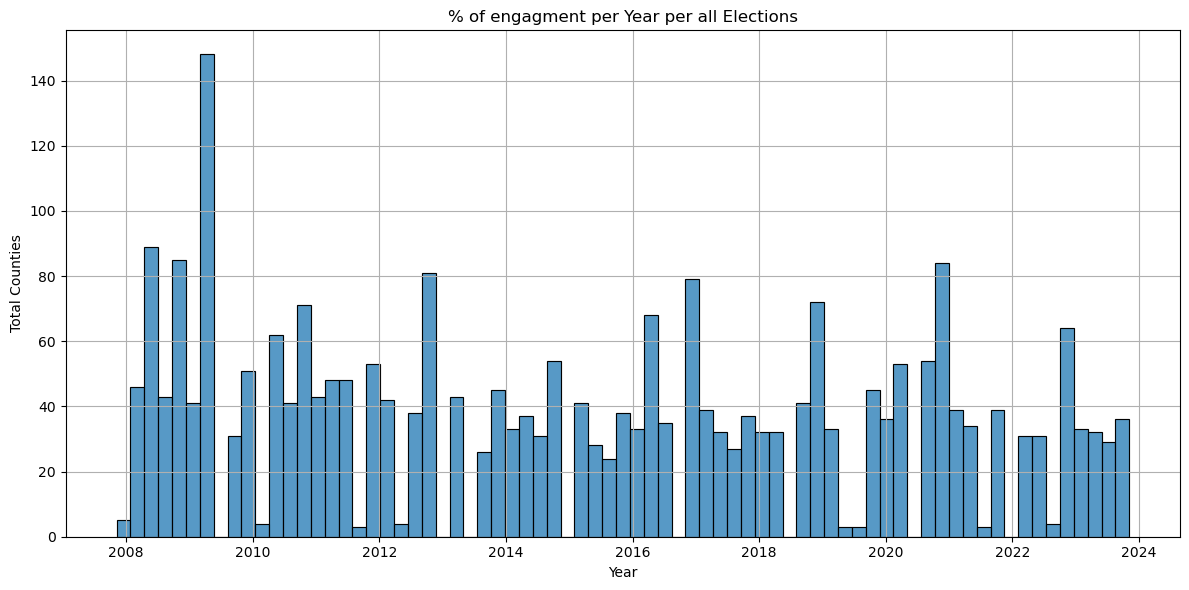

In [17]:

#-- Plotting the histogram --#
plt.figure(figsize=(12, 6))
sns.histplot(data=data_grouped2, x='Date', weights='TurnOut%', bins=len(data_grouped2['Date'].unique()), kde=False)

#-- Adding titles and labels --#
plt.title('% of engagment per Year per all Elections')
plt.xlabel('Year')
plt.ylabel('Total Counties')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()


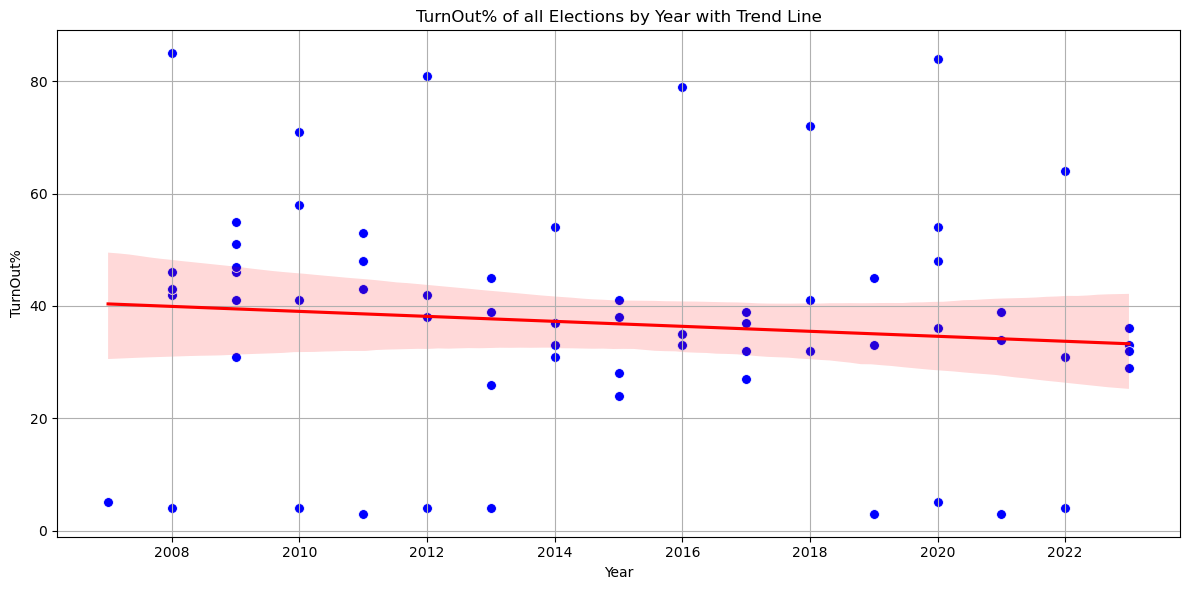

In [18]:
data_grouped2['Date'] = pd.to_datetime(data_grouped2['Date'], errors='coerce')

#-- Extracting the year from 'Date' --#
data_grouped2['Year'] = data_grouped2['Date'].dt.year



#-- Ensuring the 'TurnOut%' column is numeric if it's not already --#
data_grouped2['TurnOut%'] = pd.to_numeric(data_grouped2['TurnOut%'], errors='coerce')

#-- Plotting the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_grouped2, x='Year', y='TurnOut%', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=data_grouped2, x='Year', y='TurnOut%', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('TurnOut% of all Elections by Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()








In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Filtering for General Elections --#
df_general_elections = df[df['Election_Type_General Election'] == 1]

#--- Extracting the year from 'Date' --#
df_general_elections['Year'] = df_general_elections['Date'].dt.year

#-- Ensuring 'Total_Ballots_Counted' is numeric --#
df_general_elections['Total_Ballots_Counted'] = pd.to_numeric(df_general_elections['Total_Ballots_Counted'], errors='coerce')

#-- Dropping rows with NaN values in 'Total_Ballots_Counted' if any --#
df_general_elections = df_general_elections.dropna(subset=['Total_Ballots_Counted'])

#-- Displaying the filtered data to verify --#
print(df_general_elections[['Year', 'Total_Ballots_Counted']].head())

    Year  Total_Ballots_Counted
0   2023                1758084
4   2022                3067686
8   2021                1896481
12  2020                4116894
17  2019                2035401


/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/2493307205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_elections['Year'] = df_general_elections['Date'].dt.year
/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/2493307205.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_elections['Total_Ballots_Counted'] = pd.to_numeric(df_general_elections['Total_Ballots_Counted'], errors='coerce')


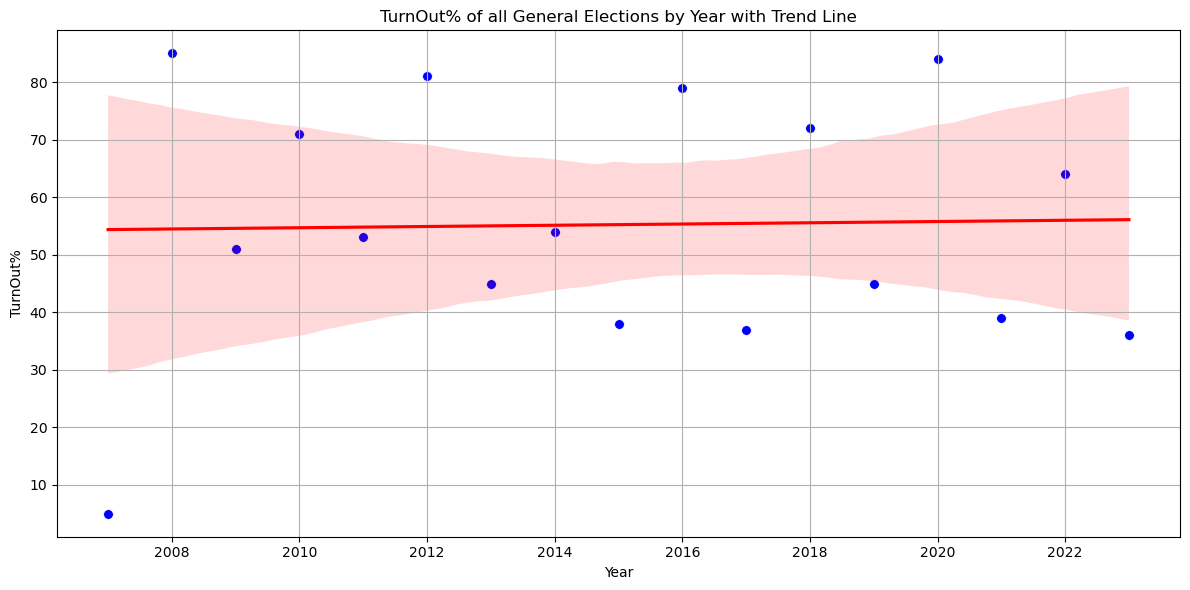

In [20]:



#-- Ensuring the 'TurnOut%' column is numeric if it's not already --#
df_general_elections['TurnOut%'] = pd.to_numeric(df_general_elections['TurnOut%'], errors='coerce')

#-- Plotting the scatter plot with trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_general_elections, x='Year', y='TurnOut%', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df_general_elections, x='Year', y='TurnOut%', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('TurnOut% of all General Elections by Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()

In [21]:
df_general_elections['TurnOut%'].describe()

count    17.000000
mean     55.235294
std      21.750085
min       5.000000
25%      39.000000
50%      53.000000
75%      72.000000
max      85.000000
Name: TurnOut%, dtype: float64

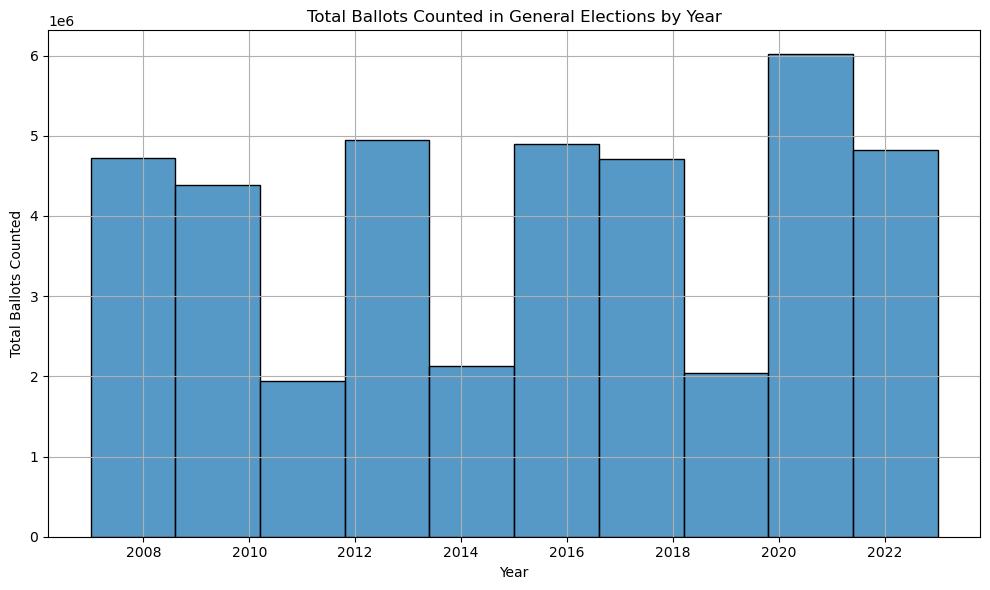

In [16]:
#-- Plotting the histogram --#
plt.figure(figsize=(10, 6))
sns.histplot(data=df_general_elections, x='Year', weights='Total_Ballots_Counted', bins=10, kde=False)

#-- Adding titles and labels --#
plt.title('Total Ballots Counted in General Elections by Year')
plt.xlabel('Year')
plt.ylabel('Total Ballots Counted')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()

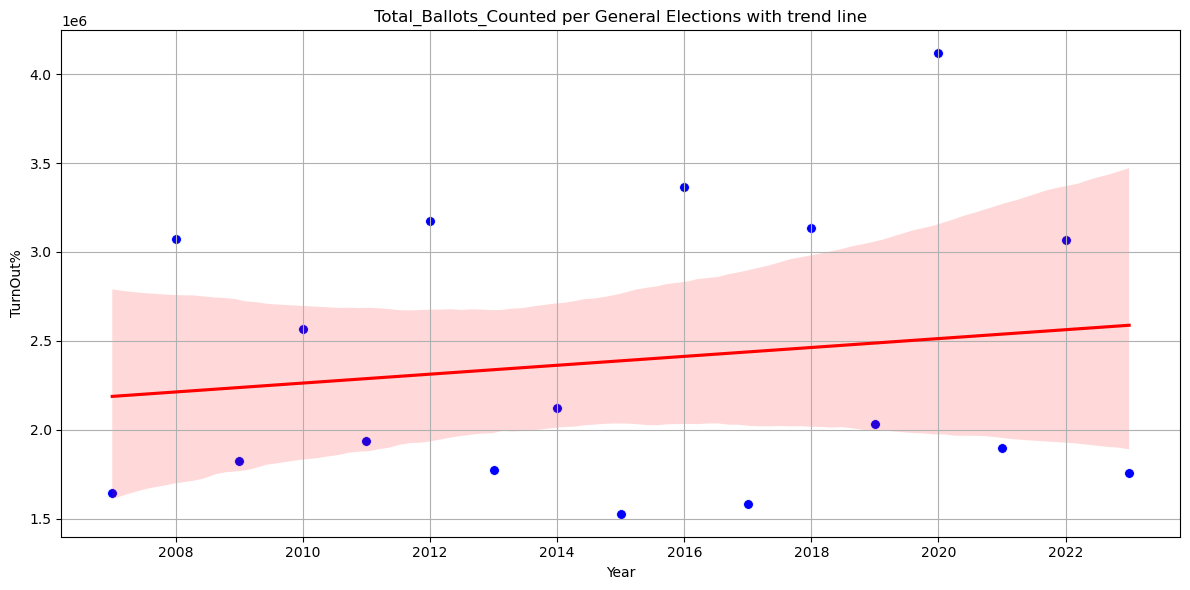

In [22]:
#-- Plotting the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_general_elections, x='Year', y='Total_Ballots_Counted', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df_general_elections, x='Year', y='Total_Ballots_Counted', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('Total_Ballots_Counted per General Elections with trend line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()

# Now doing February special election

In [23]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#-- Filtering for General Elections --#
df_FebSpecial_elections = df[df['Election_Type_February Special Election'] == 1]

#-- Extracting the year from 'Date' --#
df_FebSpecial_elections['Year'] = df_FebSpecial_elections['Date'].dt.year

#-- Ensuring 'Total_Ballots_Counted' is numeric --#
df_FebSpecial_elections['Total_Ballots_Counted'] = pd.to_numeric(df_FebSpecial_elections['Total_Ballots_Counted'], errors='coerce')

#-- Dropping rows with NaN values in 'Total_Ballots_Counted' if any --#
df_FebSpecial_elections = df_FebSpecial_elections.dropna(subset=['Total_Ballots_Counted'])

#-- Displaying the filtered data to verify --#
print(df_FebSpecial_elections[['Year', 'Total_Ballots_Counted']].head())

    Year  Total_Ballots_Counted
3   2023                 451969
7   2022                 966966
11  2021                 300066
16  2020                 754603
20  2019                 531768


/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/2219545655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FebSpecial_elections['Year'] = df_FebSpecial_elections['Date'].dt.year
/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/2219545655.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FebSpecial_elections['Total_Ballots_Counted'] = pd.to_numeric(df_FebSpecial_elections['Total_Ballots_Counted'], errors='coerce')


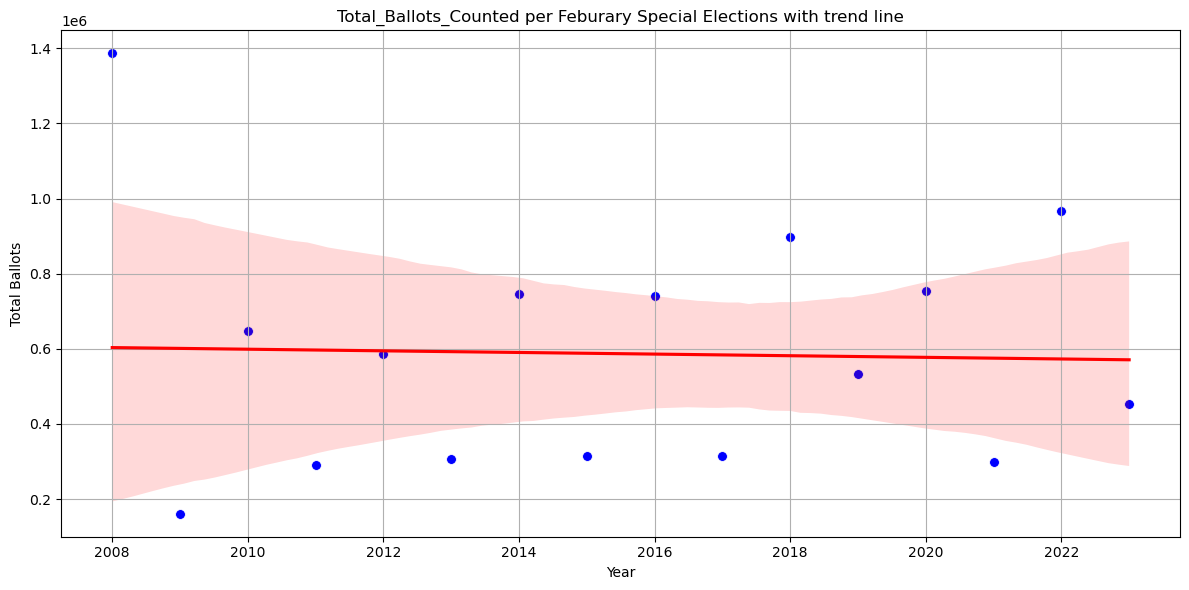

In [24]:
#-- Plotting the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_FebSpecial_elections, x='Year', y='Total_Ballots_Counted', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df_FebSpecial_elections, x='Year', y='Total_Ballots_Counted', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('Total_Ballots_Counted per Feburary Special Elections with trend line')
plt.xlabel('Year')
plt.ylabel('Total Ballots')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()

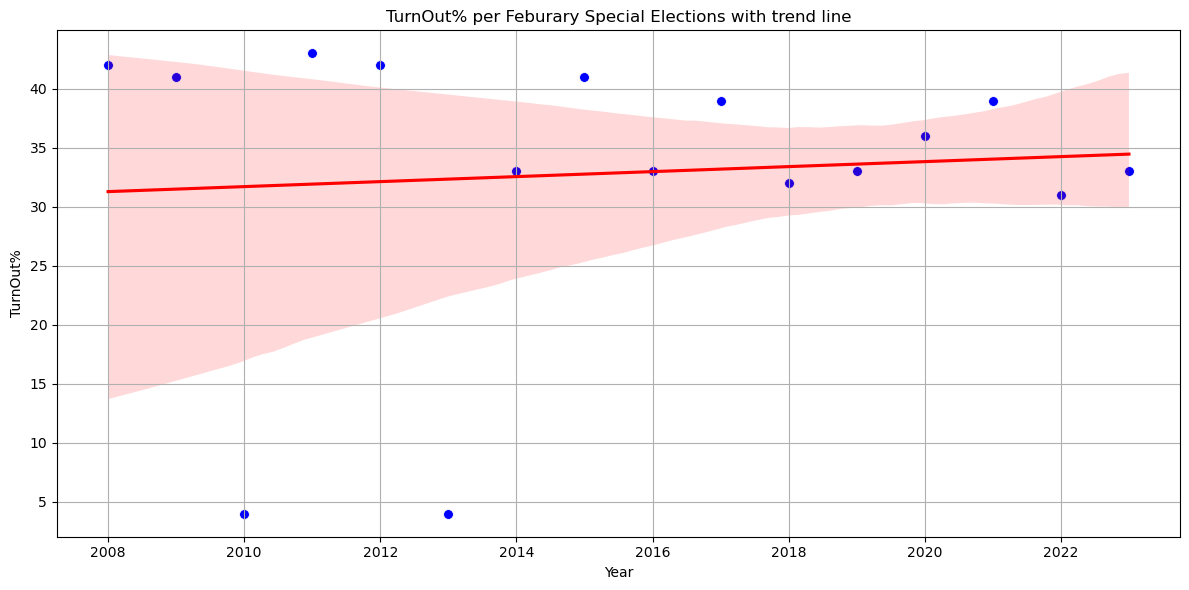

In [25]:
#-- Plottin the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_FebSpecial_elections, x='Year', y='TurnOut%', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df_FebSpecial_elections, x='Year', y='TurnOut%', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('TurnOut% per Feburary Special Elections with trend line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()

# Now exploring Primary Elections

In [26]:

#-- Filtering for General Elections --#
df_primary= df[df['Election_Type_Primary'] == 1]

#-- Extracting the year from 'Date' --#
df_primary['Year'] = df_primary['Date'].dt.year

#-- Ensuring 'Total_Ballots_Counted' is numeric --#
df_primary['Total_Ballots_Counted'] = pd.to_numeric(df_primary['Total_Ballots_Counted'], errors='coerce')

#-- Dropping rows with NaN values in 'Total_Ballots_Counted' if any --#
df_primary = df_primary.dropna(subset=['Total_Ballots_Counted'])

#-- Displayig the filtered data to verify --#
print(df_primary[['Year', 'Total_Ballots_Counted']].head(20))

    Year  Total_Ballots_Counted
1   2023                1116963
5   2022                1941933
9   2021                1294522
13  2020                2510881
18  2019                1173009
22  2018                1753545
26  2017                1017946
30  2016                1431058
35  2015                 817876
39  2014                1222710
43  2013                 837098
47  2012                1435928
51  2011                 819991
56  2010                1471791
61  2009                 724598
67  2008                1455756


/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/954556450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primary['Year'] = df_primary['Date'].dt.year
/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_9156/954556450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primary['Total_Ballots_Counted'] = pd.to_numeric(df_primary['Total_Ballots_Counted'], errors='coerce')


In [27]:
df_primary['TurnOut%'].mean()

27.0625

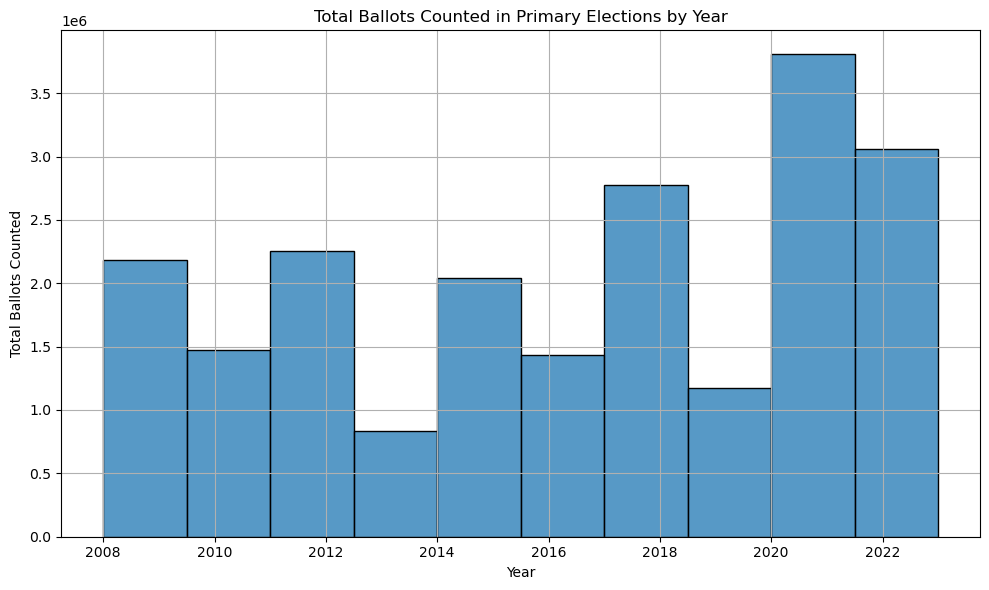

In [28]:
#-- Plot the histogram --#
plt.figure(figsize=(10, 6))
sns.histplot(data=df_primary, x='Year', weights='Total_Ballots_Counted', bins=10, kde=False)

#-- Add titles and labels --#
plt.title('Total Ballots Counted in Primary Elections by Year')
plt.xlabel('Year')
plt.ylabel('Total Ballots Counted')
plt.grid(True)

#-- Show the plot --#
plt.tight_layout()
plt.show()

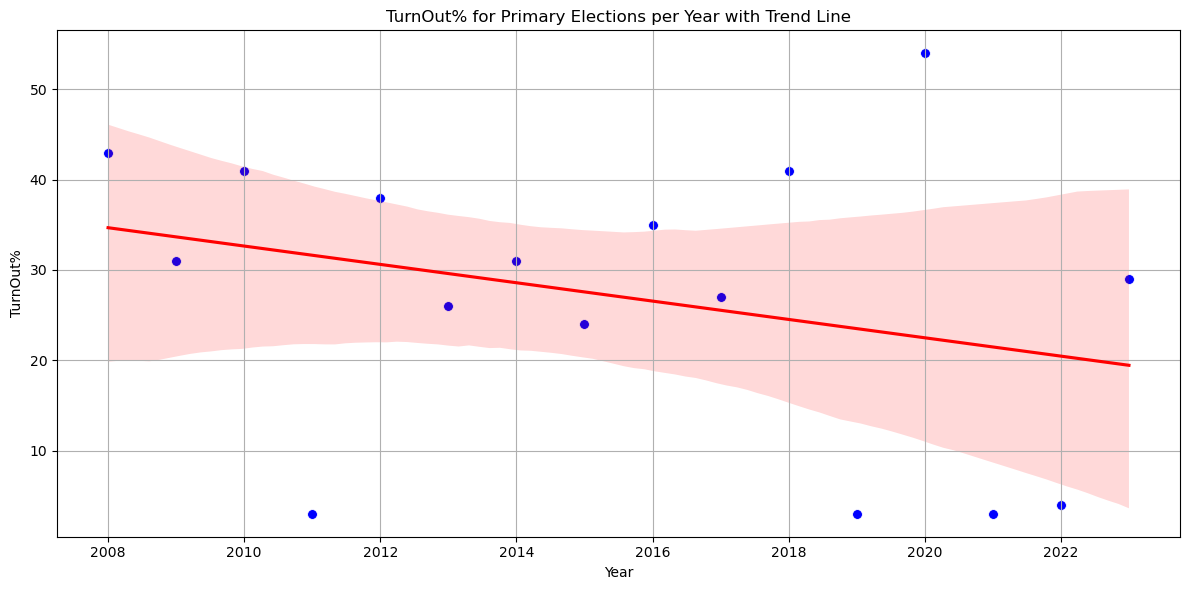

In [29]:
#-- Plot the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_primary, x='Year', y='TurnOut%', color='blue', s=50)

#-- Add a trend line --#
sns.regplot(data=df_primary, x='Year', y='TurnOut%', scatter=False, color='red')

#-- Add titles and labels --#
plt.title('TurnOut% for Primary Elections per Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Showing the plot --#
plt.tight_layout()
plt.show()


In [30]:
df_primary['TurnOut%'].describe()

count    16.000000
mean     27.062500
std      16.051869
min       3.000000
25%      19.000000
50%      30.000000
75%      38.750000
max      54.000000
Name: TurnOut%, dtype: float64

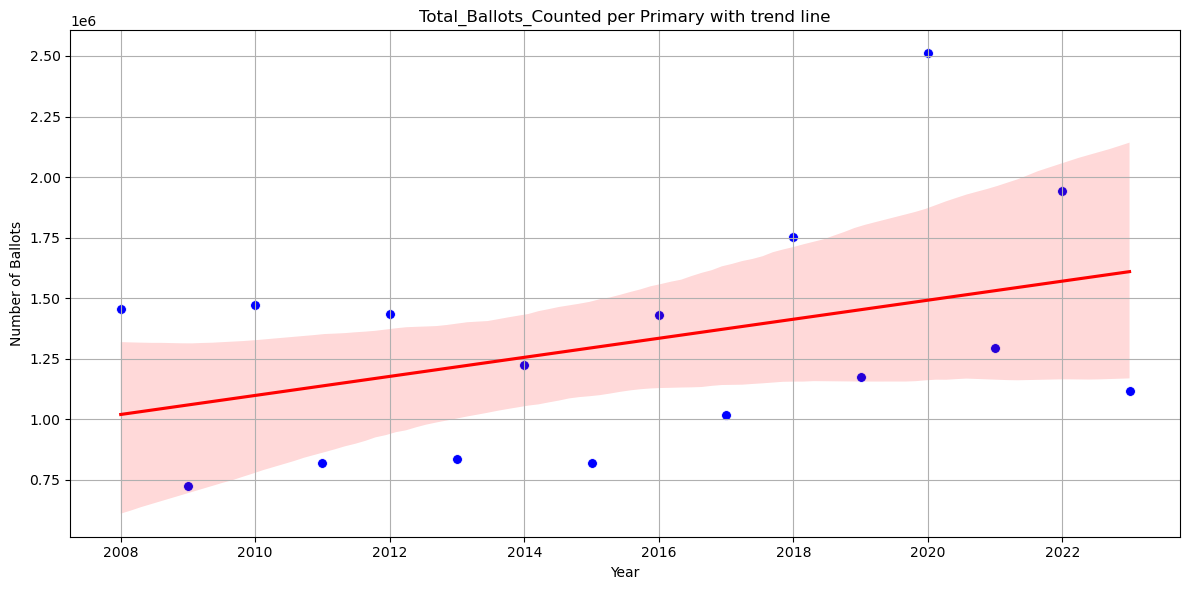

In [31]:
#-- Plotting the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_primary, x='Year', y='Total_Ballots_Counted', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df_primary, x='Year', y='Total_Ballots_Counted', scatter=False, color='red')

#-- Adding titles and labels --#
plt.title('Total_Ballots_Counted per Primary with trend line')
plt.xlabel('Year')
plt.ylabel('Number of Ballots')
plt.grid(True)
plt.tight_layout()
plt.show()


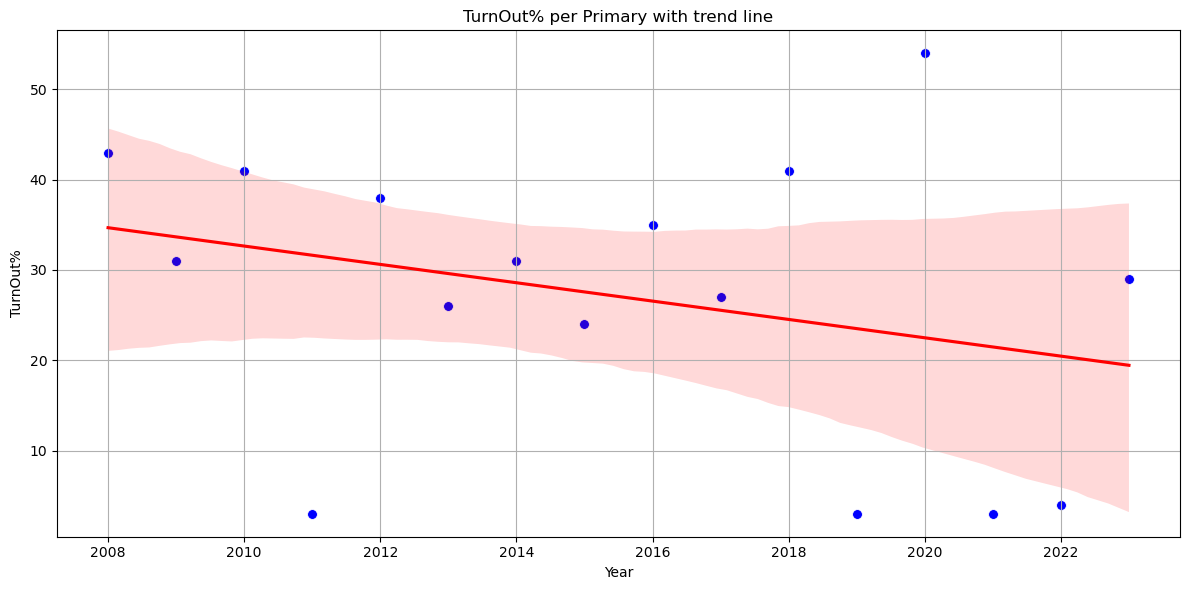

In [32]:
#-- Plot the scatter plot with trend line --#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_primary, x='Year', y='TurnOut%', color='blue', s=50)

#-- Add a trend line --#
sns.regplot(data=df_primary, x='Year', y='TurnOut%', scatter=False, color='red')

#-- Add titles and labels --#
plt.title('TurnOut% per Primary with trend line')
plt.xlabel('Year')
plt.ylabel('TurnOut%')
plt.grid(True)

#-- Show the plot --#
plt.tight_layout()
plt.show()

In [33]:
#-- Printing the Primary tunrout % mean --#
df_primary['TurnOut%'].mean()

27.0625

# Now comparig the number of Regitered voters 

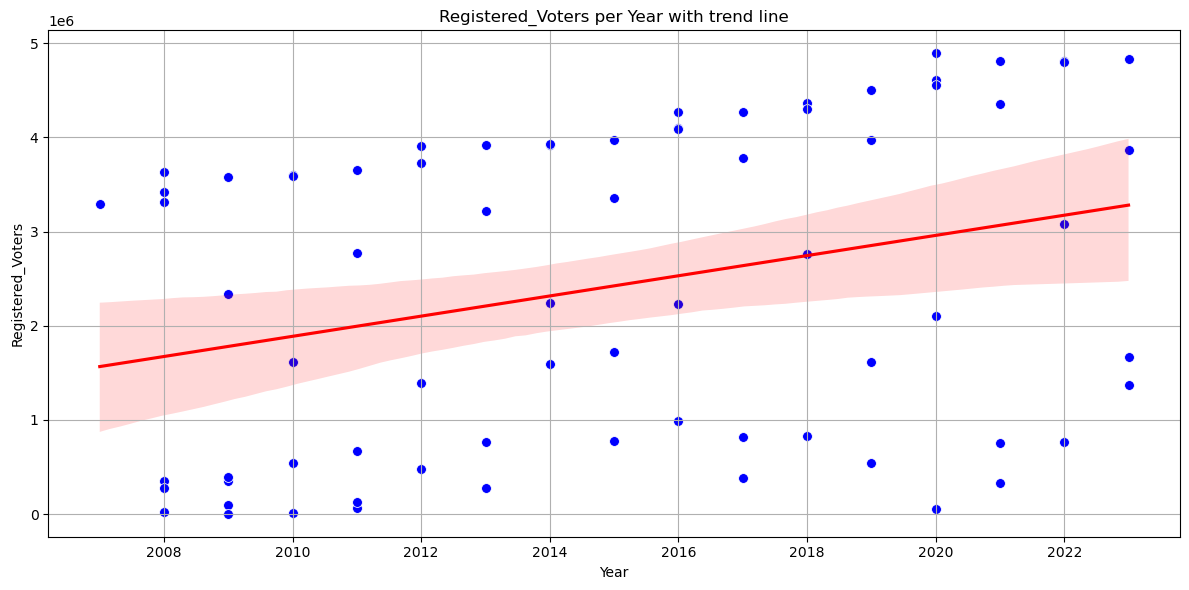

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Registered_Voters', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df, x='Year', y='Registered_Voters', scatter=False, color='red')

#-- Add titles and labels --#
plt.title('Registered_Voters per Year with trend line')
plt.xlabel('Year')
plt.ylabel('Registered_Voters')
plt.grid(True)
plt.tight_layout()
plt.show()

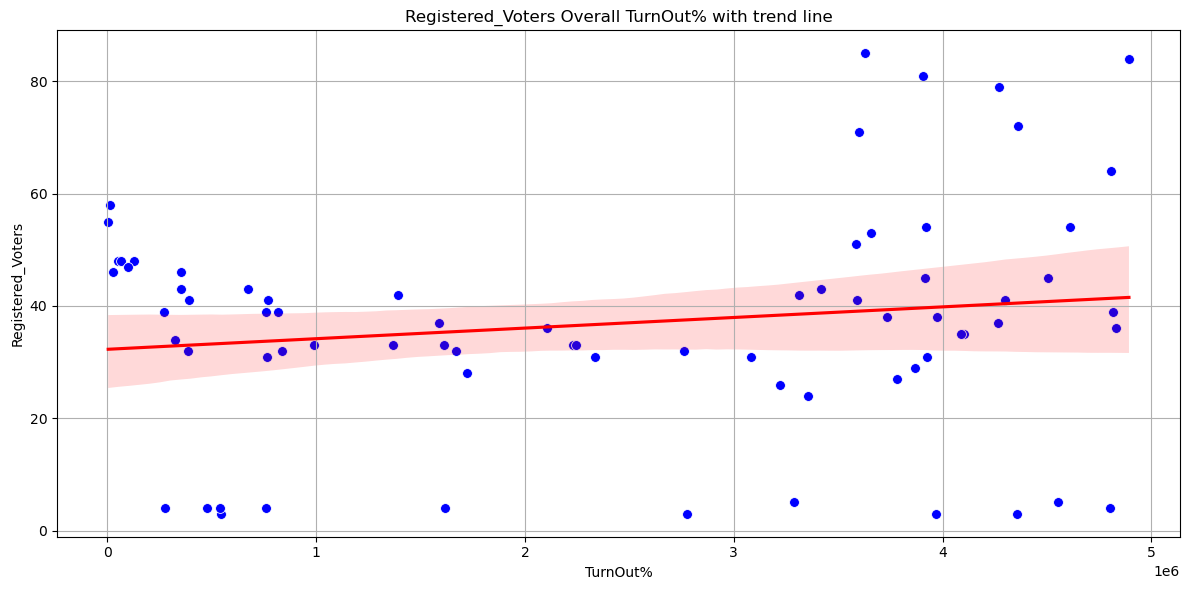

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, y='TurnOut%', x='Registered_Voters', color='blue', s=50)

#-- Adding a trend line --#
sns.regplot(data=df, y='TurnOut%', x='Registered_Voters', scatter=False, color='red')

#-- Add titles and labels --#
plt.title('Registered_Voters Overall TurnOut% with trend line')
plt.xlabel('TurnOut%')
plt.ylabel('Registered_Voters')
plt.grid(True)

#-- Show the plot --#
plt.tight_layout()
plt.show()

In [36]:
df.columns

Index(['Date', 'Counties', 'Precincts', 'Registered_Voters',
       'Total_Ballots_Counted', 'TurnOut%',
       'Election_Type_February Special Election',
       'Election_Type_General Election',
       'Election_Type_March Special Election',
       'Election_Type_May Special Election',
       'Election_Type_Presidential Primary', 'Election_Type_Primary', 'Year'],
      dtype='object')

# Now using Machine Learning 

Using Random Forrest to predict the voter turnout% for the next 10 years.

In [39]:

#-- Step 1: Prepare the data --#
X = df[['Year']]  # Independent variable
y = df['TurnOut%']  # Dependent variable

#-- Step 2: Split the data into training and testing sets --#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-- Step 3: Train the Random Forest model --#
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#-- Step 4: Predict using the model --#
y_pred = model.predict(X_test)

#-- Step 5: Calculate R² and MSE --#
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Squared Error: {mse}')

#-- Step 6: Predict for the next 10 years --#
future_years = pd.DataFrame({'Year': np.arange(df['Year'].max() + 1, df['Year'].max() + 11)})
future_predictions = model.predict(future_years)

#-- Print future predictions --#
future_years['Predicted TurnOut%'] = future_predictions
print(future_years)

#-- Step 7: Calculate confusion matrix (only applicable for classification) --#
#-- Since this is a regression problem, a confusion matrix isn't directly applicable.--#
#-- However, if you want to classify TurnOut% into bins and then calculate it: --#
threshold = 50  # Example threshold for binary classification
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(conf_matrix)


R² Score: -0.1383240789296596
Mean Squared Error: 748.68333553923
   Year  Predicted TurnOut%
0  2024           31.304643
1  2025           31.304643
2  2026           31.304643
3  2027           31.304643
4  2028           31.304643
5  2029           31.304643
6  2030           31.304643
7  2031           31.304643
8  2032           31.304643
9  2033           31.304643
Confusion Matrix:
[[11  0]
 [ 4  0]]
